# Resample ski detection and concatenate for all cameras

In [36]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cams = ('jervskogen_1', 'jervskogen_2', 'nilsbyen_2', 'nilsbyen_3', 'skistua')

df_skiers = pd.DataFrame()

for cam in cams:   
    df_tmp = pd.read_csv('../data/datasets/'+cam+'.csv')
    df_tmp = df_tmp[(df_tmp['class']=='person') & (df_tmp['conf']>0.5)]
    df_tmp['timestamp']=pd.to_datetime(df_tmp['timestamp'])

    df_skiers[cam] = df_tmp['timestamp'].sort_values().value_counts(sort=False).resample('H',label='right').sum()
    
df_skiers = df_skiers.fillna(0)

In [19]:
df_skiers

,jervskogen_1,jervskogen_2,nilsbyen_2,nilsbyen_3,skistua
2021-12-11 12:00:00,2,2.0,1.0,0,5.0
2021-12-11 13:00:00,7,10.0,3.0,1,8.0
2021-12-11 14:00:00,6,10.0,4.0,4,12.0
2021-12-11 15:00:00,8,8.0,1.0,0,11.0
2021-12-11 16:00:00,5,7.0,0.0,0,3.0
...,...,...,...,...,...
2022-02-17 11:00:00,6,0.0,0.0,0,0.0
2022-02-17 12:00:00,6,0.0,1.0,1,0.0
2022-02-17 13:00:00,6,0.0,3.0,0,0.0
2022-02-17 14:00:00,6,0.0,4.0,1,0.0


# Get weather data

In [21]:
%run get_data_met.py
import pandas as pd

client_id = '96f63ab5-8a9e-42e2-94a5-7fdbfcf90f0c'

start_time = pd.Timestamp(year=2021,month=12,day=11)
end_time = pd.Timestamp(year=2022,month=2,day=18)
source = 'SN68860'
elements = ['air_temperature','relative_humidity','sum(precipitation_amount PT1H)','surface_air_pressure','wind_speed','wind_from_direction']

df_met = get_data_met(client_id,source, elements, start_time, end_time)

Data retrieved from frost.met.no!
len data = 1656


/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/mnt/ntnu/ai4eu/ski-cam-detection/utils/get_data_met.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [26]:
df_met

,air_temperature,relative_humidity,sum(precipitation_amount PT1H),surface_air_pressure,wind_speed,wind_from_direction
time,,,,,,
2021-12-11 00:00:00,-2.2,76.0,0.0,992.3,0.4,45.0
2021-12-11 01:00:00,-1.3,76.0,0.0,992.6,1.2,47.0
2021-12-11 02:00:00,-0.9,77.0,0.0,992.8,1.2,65.0
2021-12-11 03:00:00,-0.5,70.0,0.0,992.8,1.4,274.0
2021-12-11 04:00:00,1.8,65.0,0.0,993.0,1.8,201.0
...,...,...,...,...,...,...
2022-02-17 19:00:00,-3.2,92.0,0.0,961.9,0.5,233.0
2022-02-17 20:00:00,-3.1,92.0,0.1,962.0,0.5,269.0
2022-02-17 21:00:00,-3.1,92.0,0.0,962.2,0.6,257.0


# Merge skier detections and weather data

In [60]:
df_merge=pd.concat([df_skiers,df_met],axis=1)

df_merge.to_csv('../data/datasets/skiers_weather.csv')

## Add time and day info for analysis

In [ ]:
## Add info on time and day
df_merge['weekday'] = df_merge.index.weekday
df_merge['hour'] = df_merge.index.hour
df_merge['weekday_hour'] = df_merge['weekday']*df_merge['hour']

# Correlation tests

In [61]:
def plotCorrMatrix(df,figSize,hmapL,draw_triu=True):
    corrMatrix = df.corr(method='pearson')
    fig, ax = plt.subplots(figsize=(figSize[0],figSize[1]))
    if draw_triu == True:
        mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
        sn.heatmap(corrMatrix,mask=mask,ax=ax,cmap='coolwarm',vmin=hmapL[0],vmax=hmapL[1],annot=True,fmt='.2f')
    else:
        sn.heatmap(corrMatrix,ax=ax,cmap='coolwarm',vmin=hmapL[0],vmax=hmapL[1],annot=True,fmt='.2f')
    sn.set_context("talk")
    plt.show()
    
    return corrMatrix

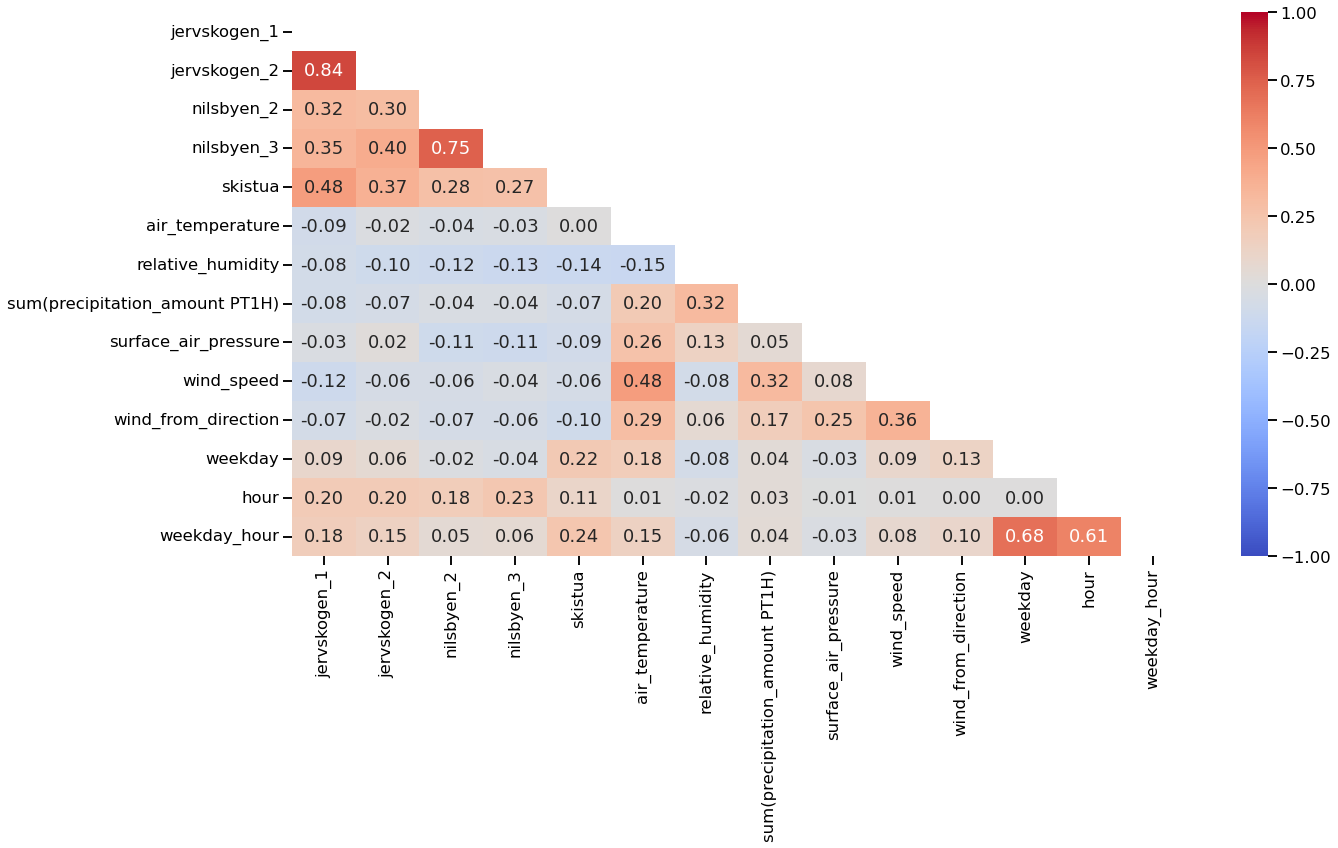

,jervskogen_1,jervskogen_2,nilsbyen_2,nilsbyen_3,skistua,air_temperature,relative_humidity,sum(precipitation_amount PT1H),surface_air_pressure,wind_speed,wind_from_direction,weekday,hour,weekday_hour
jervskogen_1,1.000000,0.840714,0.319575,0.349999,0.477216,-0.086963,-0.082187,-0.078262,-0.025606,-0.115307,-0.074007,8.957737e-02,2.029161e-01,0.179444
jervskogen_2,0.840714,1.000000,0.297695,0.404174,0.367665,-0.023217,-0.101710,-0.065749,0.017247,-0.062355,-0.023665,5.651299e-02,1.991112e-01,0.145645
nilsbyen_2,0.319575,0.297695,1.000000,0.748445,0.277911,-0.042942,-0.116898,-0.035503,-0.107532,-0.061181,-0.066619,-1.899236e-02,1.802417e-01,0.052268
nilsbyen_3,0.349999,0.404174,0.748445,1.000000,0.270507,-0.033110,-0.127688,-0.036521,-0.110539,-0.037186,-0.063088,-4.060270e-02,2.281350e-01,0.058086
skistua,0.477216,0.367665,0.277911,0.270507,1.000000,0.001546,-0.138905,-0.069366,-0.093511,-0.062596,-0.096822,2.175294e-01,1.079096e-01,0.238843
air_temperature,-0.086963,-0.023217,-0.042942,-0.033110,0.001546,1.000000,-0.145949,0.203734,0.260728,0.484068,0.289926,1.826317e-01,7.002644e-03,0.145767
relative_humidity,-0.082187,-0.101710,-0.116898,-0.127688,-0.138905,-0.145949,1.000000,0.317293,0.134388,-0.080794,0.057885,-7.811553e-02,-2.038786e-02,-0.058355
sum(precipitation_amount PT1H),-0.078262,-0.065749,-0.035503,-0.036521,-0.069366,0.203734,0.317293,1.000000,0.050198,0.315918,0.174503,3.726876e-02,3.442718e-02,0.041996
surface_air_pressure,-0.025606,0.017247,-0.107532,-0.110539,-0.093511,0.260728,0.134388,0.050198,1.000000,0.077085,0.245023,-3.128667e-02,-5.563643e-03,-0.029637
wind_speed,-0.115307,-0.062355,-0.061181,-0.037186,-0.062596,0.484068,-0.080794,0.315918,0.077085,1.000000,0.364858,9.330982e-02,5.462262e-03,0.076453


In [62]:
plotCorrMatrix(df_merge,(20,10),[-1,1])

# Playground for tests

In [57]:
df_merge['weekday_hour'] = df_merge['weekday']*df_merge['hour']

In [59]:
df_merge['weekday_hour'][0:48]

2021-12-11 00:00:00      0
2021-12-11 01:00:00      5
2021-12-11 02:00:00     10
2021-12-11 03:00:00     15
2021-12-11 04:00:00     20
2021-12-11 05:00:00     25
2021-12-11 06:00:00     30
2021-12-11 07:00:00     35
2021-12-11 08:00:00     40
2021-12-11 09:00:00     45
2021-12-11 10:00:00     50
2021-12-11 11:00:00     55
2021-12-11 12:00:00     60
2021-12-11 13:00:00     65
2021-12-11 14:00:00     70
2021-12-11 15:00:00     75
2021-12-11 16:00:00     80
2021-12-11 17:00:00     85
2021-12-11 18:00:00     90
2021-12-11 19:00:00     95
2021-12-11 20:00:00    100
2021-12-11 21:00:00    105
2021-12-11 22:00:00    110
2021-12-11 23:00:00    115
2021-12-12 00:00:00      0
2021-12-12 01:00:00      6
2021-12-12 02:00:00     12
2021-12-12 03:00:00     18
2021-12-12 04:00:00     24
2021-12-12 05:00:00     30
2021-12-12 06:00:00     36
2021-12-12 07:00:00     42
2021-12-12 08:00:00     48
2021-12-12 09:00:00     54
2021-12-12 10:00:00     60
2021-12-12 11:00:00     66
2021-12-12 12:00:00     72
2